An individual’s annual income results from various factors. Intuitively, it is influenced by the individual’s education level, age, gender, occupation, and etc. 
We will explore the dataset. The dataset contains 16 columns
Target field: Income. The income is divide into two classes: <=50K and >50K.
We will explore the dataset and note insights.


In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,PolynomialFeatures
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,ConfusionMatrixDisplay
from scipy.optimize import differential_evolution
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings("ignore")
sns.set_theme(style='darkgrid')

In [88]:
df = pd.read_csv("adult.csv")
print("\n","="*52,"Head Of data","="*52,"\n")
display(df.head())
print("\n","="*52,"Tail Of data","="*52,"\n")
display(df.tail())


 ==================================================== Head Of data ==================================================== 



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K



 ==================================================== Tail Of data ==================================================== 



,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K



1. There is missing values have value "?"<br>
2. All data in native-country column has value "United-States" so may be US is the most country in dataset<br>
3. Each education has its own educational-num<br></p>
All this informations we notice from only first 5 rows and last 5 rows we need to get more info</p>



> **Replace '?' with `Nan`**

In [89]:
df.replace('?',np.nan,inplace=True)

In [90]:
print("\n","="*20,"Shape Of data","="*20,"\n")
print(df.shape)
print("\n","\b","="*15,"Informations about data","="*15,"\n")
print(df.info())


 ==================== Shape Of data ==================== 

(48842, 15)

  =============== Informations about data =============== 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        46043 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       46033 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   47985 non-null  object
 14  income           48842 non-null 

From information we find out there is null values in:

1. Column "worlclass"<br>
2. Column "occupation"<br>
3. Column "native-country"<p>
</div>

In [91]:
print("\n","="*25,"Describtion about data","="*25,"\n")
display(df.describe())


 ========================= Describtion about data ========================= 



,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


## **Univariate Analysis**

### **Categorial columns analysis**

In [92]:
categorial_data = df.select_dtypes(include="object")
for col in categorial_data.columns:
    print(f"{col.capitalize()}: {len(df[col].unique())}\n")
    print("="*80)
print(f"Number of categorial columns = {categorial_data.shape[1]}")

Workclass: 9

Education: 16

Marital-status: 7

Occupation: 15

Relationship: 6

Race: 5

Gender: 2

Native-country: 42

Income: 2

Number of categorial columns = 9


   
> **Workclass column**


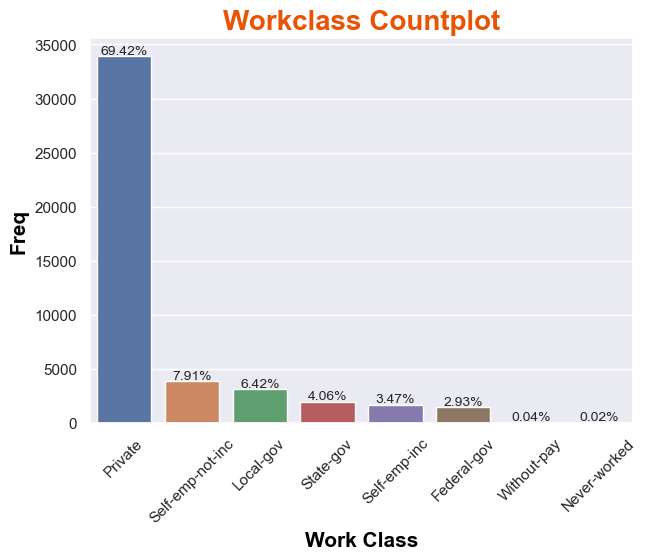


 ################################################## Frequency table ################################################## 



,count,Percentage
workclass,,
Private,33906,69.42
Self-emp-not-inc,3862,7.91
Local-gov,3136,6.42
State-gov,1981,4.06
Self-emp-inc,1695,3.47
Federal-gov,1432,2.93
Without-pay,21,0.04
Never-worked,10,0.02


In [93]:
work_values = df["workclass"].value_counts()
fig , axis = plt.subplots(figsize=(7,5))
##################################Bar Chart##################################
plt.title("Workclass Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="workclass",order = work_values.index)
plt.xlabel("Work Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=45)
for idx in range(len(work_values)):
    text = f"{work_values.values[idx]*100/len(df):.2f}%"
    plt.text(x=idx,y=work_values.values[idx]+180,s=text,fontsize=10,ha='center')
plt.show()
print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(work_values)
freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)

In [94]:
print("Null values in workclass column =",df.workclass.isna().sum())

Null values in workclass column = 2799


From analysis workclass we can findout:

    - Private category is the majority category so in the most this feature will not be useful for our model<br>
    - Column have 2795 null row

  
> **Education column**


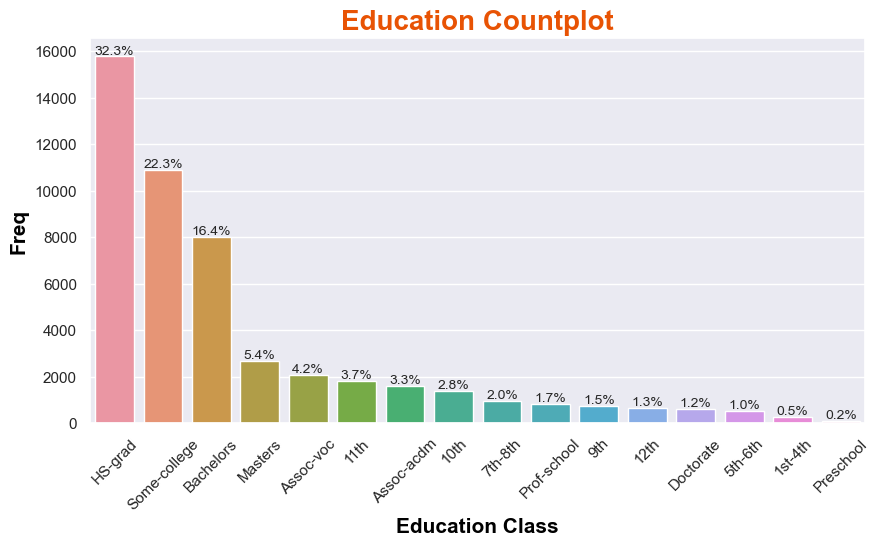

In [95]:
education_values = df["education"].value_counts()
fig , axis = plt.subplots(figsize=(10,5))
##################################Bar Chart##################################
plt.title("Education Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="education",order = education_values.index)
plt.xlabel("Education Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=45)
for idx in range(len(education_values)):
    text = f"{education_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx,y=education_values.values[idx]+100,s=text,fontsize=10,ha='center')
plt.show()

From analysis education we can findout:</p>
    - HS-grad, Some-college, and Bachelors categories are the majority categories and other columns have low frequency

 
> **Marital-status column**


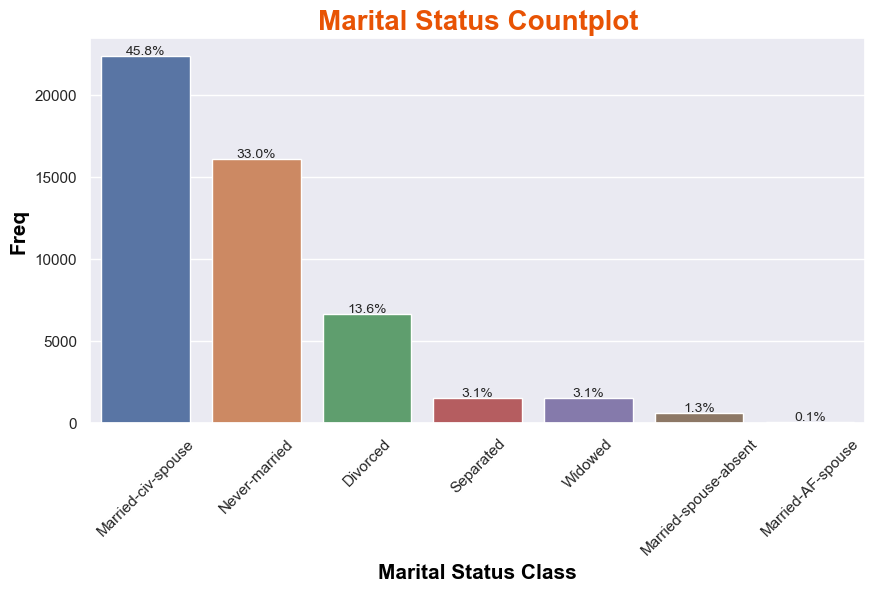


 ################################################## Frequency table ################################################## 



,count,Percentage
marital-status,,
Married-civ-spouse,22379,45.82
Never-married,16117,33.00
Divorced,6633,13.58
Separated,1530,3.13
Widowed,1518,3.11
Married-spouse-absent,628,1.29
Married-AF-spouse,37,0.08


In [96]:
marital_values = df["marital-status"].value_counts()
fig , axis = plt.subplots(figsize=(10,5))
##################################Bar Chart##################################
plt.title("Marital Status Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="marital-status",order = marital_values.index)
plt.xlabel("Marital Status Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=45)
for idx in range(len(marital_values)):
    text = f"{marital_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx,y=marital_values.values[idx]+100,s=text,fontsize=10,ha='center')
plt.show()
print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(marital_values)
freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)

From analysis Marital Status we can findout:
    - Married-civ-spouse, Never-married, and Divorced are the majority categories

    - Sparated, Widowed, Married-spouse-absent, and Married-AF-spouse minority categories


   
> **Occupation column**


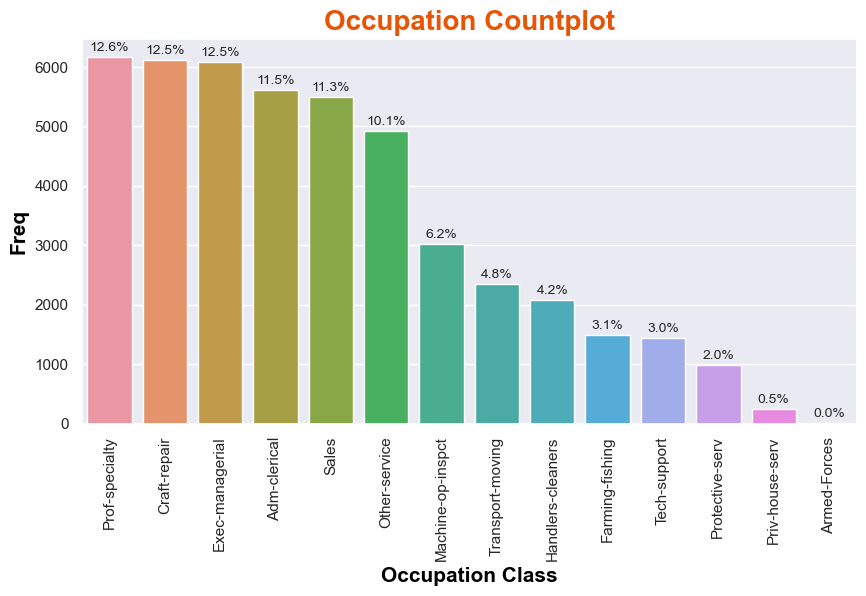


 ################################################## Frequency table ################################################## 



,count,Percentage
occupation,,
Prof-specialty,6172,12.64
Craft-repair,6112,12.51
Exec-managerial,6086,12.46
Adm-clerical,5611,11.49
Sales,5504,11.27
Other-service,4923,10.08
Machine-op-inspct,3022,6.19
Transport-moving,2355,4.82
Handlers-cleaners,2072,4.24


In [97]:
occu_values = df.occupation.value_counts()
fig , axis = plt.subplots(figsize=(10,5))
##################################Bar Chart##################################
plt.title("Occupation Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="occupation",order = occu_values.index)
plt.xlabel("Occupation Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=90)
for idx in range(len(occu_values)):
    text = f"{occu_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx,y=occu_values.values[idx]+100,s=text,fontsize=10,ha='center')
plt.show()
print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(occu_values)
freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)

In [98]:
print("Null values in occupation Status column =",df["occupation"].isnull().sum())

Null values in occupation Status column = 2809


From analysis occupation we can findout:

    - Armed-Forces & Priv-house-serv category is the minority category 
    
    - this column have 2805 null row

     
> **Relationship column**   


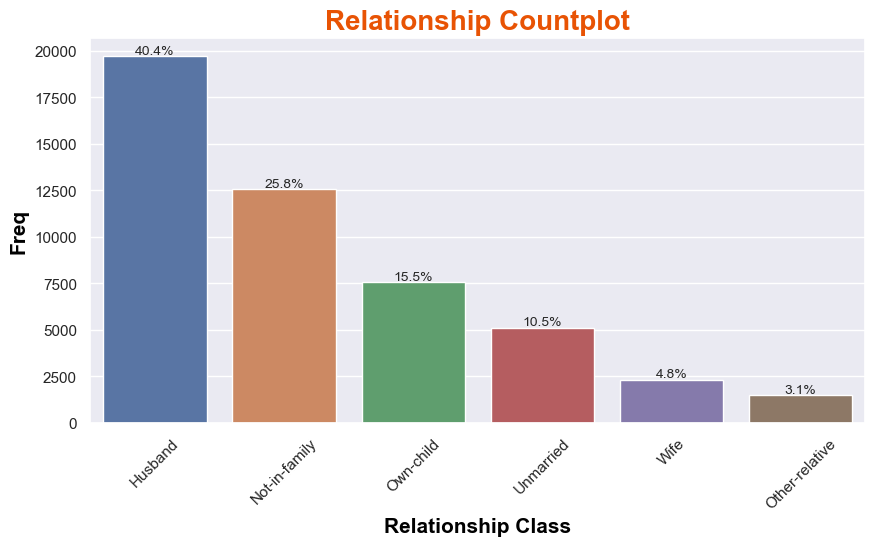


 ################################################## Frequency table ################################################## 



,count,Percentage
relationship,,
Husband,19716,40.37
Not-in-family,12583,25.76
Own-child,7581,15.52
Unmarried,5125,10.49
Wife,2331,4.77
Other-relative,1506,3.08


In [99]:
relation_values=df.relationship.value_counts()
fig , axis = plt.subplots(figsize=(10,5))
##################################Bar Chart##################################
plt.title("Relationship Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="relationship",order = relation_values.index)
plt.xlabel("Relationship Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=45)
for idx in range(len(relation_values)):
    text = f"{relation_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx,y=relation_values.values[idx]+100,s=text,fontsize=10,ha='center')
plt.show()
print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(relation_values)
freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)

From analysis Relationship we can findout: <br>
    - Husband category is the majority category  


  
> **Race column**


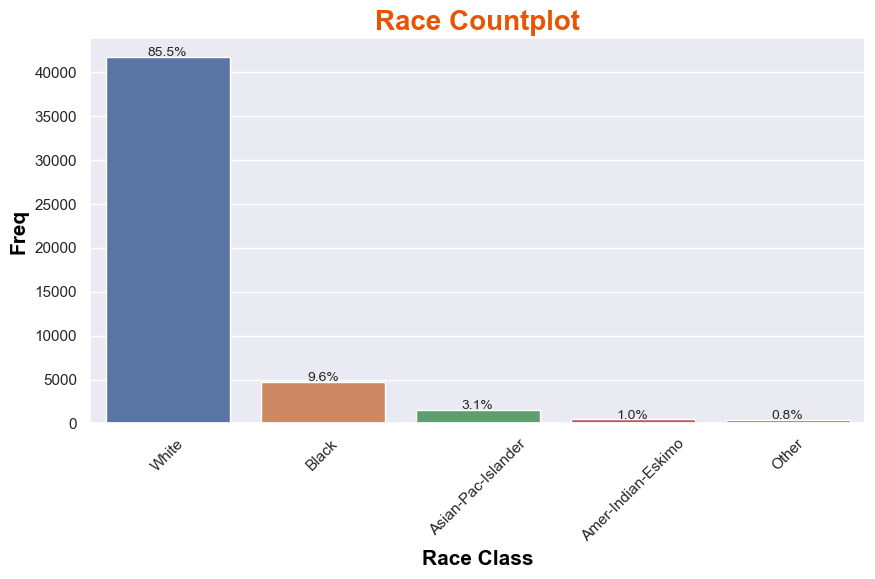


 ################################################## Frequency table ################################################## 



,count,Percentage
race,,
White,41762,85.50
Black,4685,9.59
Asian-Pac-Islander,1519,3.11
Amer-Indian-Eskimo,470,0.96
Other,406,0.83


In [100]:
race_values = df.race.value_counts()
fig , axis = plt.subplots(figsize=(10,5))
##################################Bar Chart##################################
plt.title("Race Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="race",order = race_values.index)
plt.xlabel("Race Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=45)
for idx in range(len(race_values)):
    text = f"{race_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx,y=race_values.values[idx]+100,s=text,fontsize=10,ha='center')
plt.show()
print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(race_values)
freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)


From analysis Race we can findout:<br>
    - White category is the majority category so in the most this feature will not be useful for our ML model

  
> **Native Country column**   


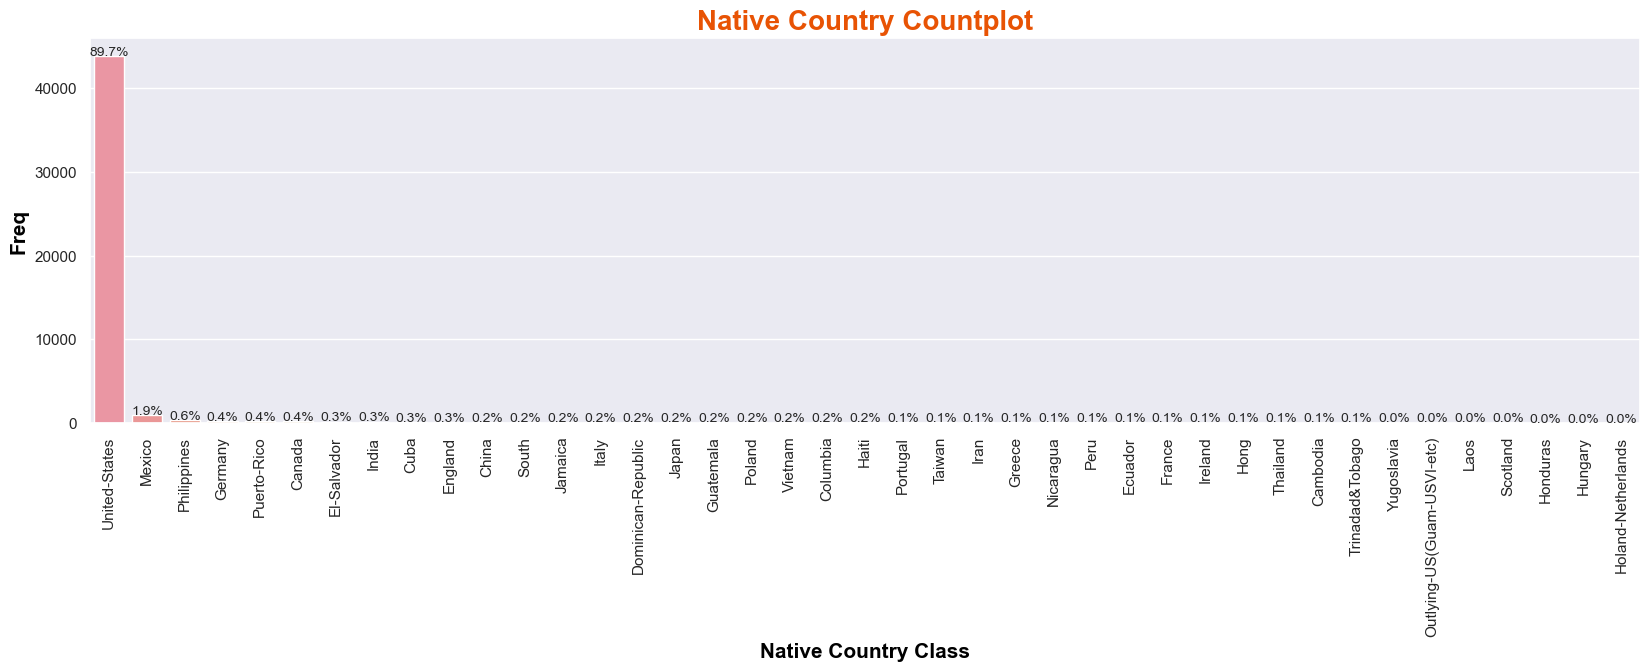

In [101]:
native_country_values = df["native-country"].value_counts()
fig , axis = plt.subplots(figsize=(20,5))
##################################Bar Chart##################################
plt.title("Native Country Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="native-country",order = native_country_values.index)
plt.xlabel("Native Country Class",fontsize=15,color='black',weight="bold")
plt.ylabel("Freq",fontsize=15,color='black',weight="bold")
plt.tick_params(axis='x', labelrotation=90)
for idx in range(len(native_country_values)):
    text = f"{native_country_values.values[idx]*100/len(df):.1f}%"
    plt.text(x=idx,y=native_country_values.values[idx]+100,s=text,fontsize=10,ha='center')
plt.show()

In [102]:
print("Null values in Native Country column =",df["native-country"].isnull().sum())

Null values in Native Country column = 857


From analysis Native Country we can findout:
    - United States category is the majority category so in the most this column will reduce our accuracy and will not be useful for ML moel <br>
    - have 856 null rows


> **Gender column**   


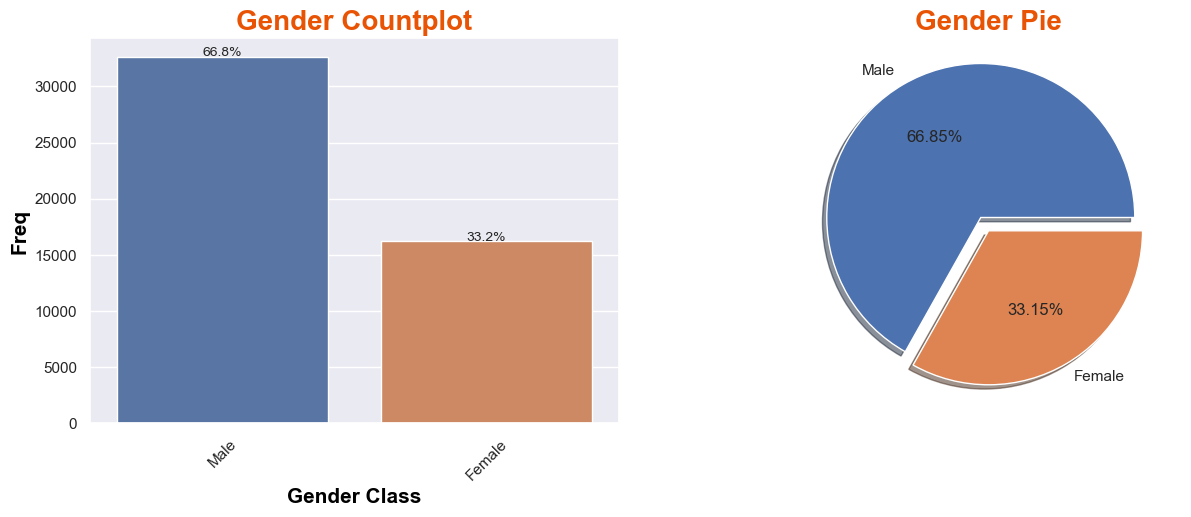


 ################################################## Frequency table ################################################## 



,count,Percentage
gender,,
Male,32650,66.85
Female,16192,33.15


In [103]:
gender_values = df.gender.value_counts()
fig , axis = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
##################################Bar Chart##################################
axis[0].set_title("Gender Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="gender",order = gender_values.index,ax=axis[0])
axis[0].set_xlabel("Gender Class",fontsize=15,color='black',weight="bold")
axis[0].set_ylabel("Freq",fontsize=15,color='black',weight="bold")
axis[0].tick_params(axis='x', labelrotation=45)
for idx in range(len(gender_values)):
    text = f"{gender_values.values[idx]*100/len(df):.1f}%"
    axis[0].text(x=idx,y=gender_values.values[idx]+100,s=text,fontsize=10,ha='center')
##################################Pie Chart##################################
axis[1].pie(gender_values.values,labels=gender_values.index,autopct="%.2f%%",explode=[0.1,0],shadow=True)
axis[1].set_title("Gender Pie",fontsize=20,color='#e85304',weight="bold")
plt.show()
print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(gender_values)
freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)

From analysis Gender we can findout:<br>
    - Male category is the majority category
    <br><br>
    - Female category is the minority category
    </p>

</div>

   
> **Income column**   


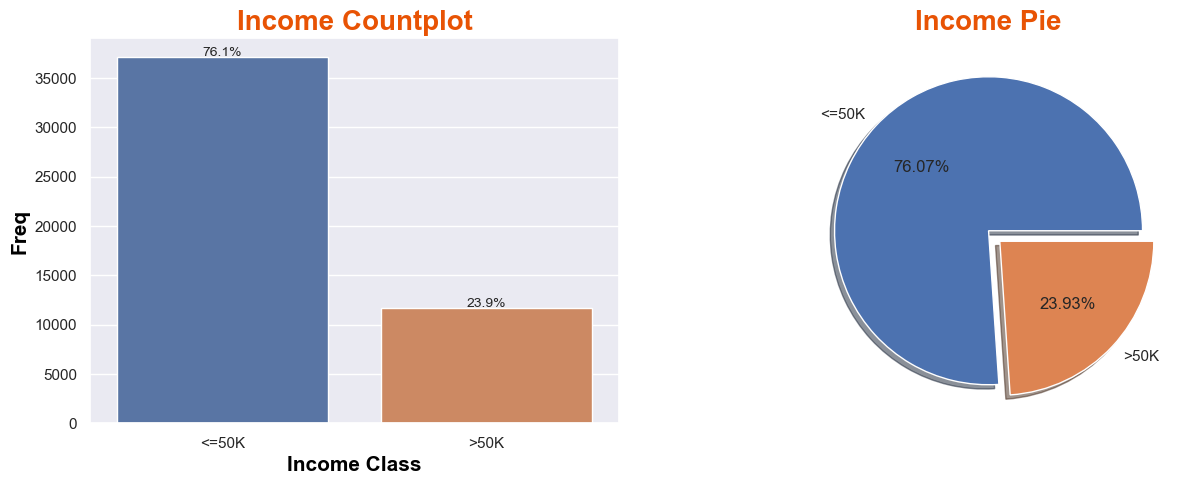


 ################################################## Frequency table ################################################## 



,count,Percentage
income,,
<=50K,37155,76.07
>50K,11687,23.93


In [104]:
income_values = df.income.value_counts()
fig , axis = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
##################################Bar Chart##################################
axis[0].set_title("Income Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="income",order = income_values.index,ax=axis[0])
axis[0].set_xlabel("Income Class",fontsize=15,color='black',weight="bold")
axis[0].set_ylabel("Freq",fontsize=15,color='black',weight="bold")
for idx in range(len(income_values)):
    text = f"{income_values.values[idx]*100/len(df):.1f}%"
    axis[0].text(x=idx,y=income_values.values[idx]+100,s=text,fontsize=10,ha='center')
##################################Pie Chart##################################
axis[1].pie(income_values.values,labels=income_values.index,explode=[0,0.1],shadow=True,autopct="%.2f%%")
axis[1].set_title("Income Pie",color='#e85304',fontsize=20,weight="bold")
plt.show()

print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(income_values)
freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)

From analysis Income we can findout:<br>
    - Target column imbalanced<br><br>
    - <=50k category is the majority category</p>
</div>

### **Quantitative Data**

In [105]:
quantitative_columns = df.select_dtypes(exclude="object")
for col in quantitative_columns:
    print(col.capitalize())

Age
Fnlwgt
Educational-num
Capital-gain
Capital-loss
Hours-per-week


  
> **Age column**   


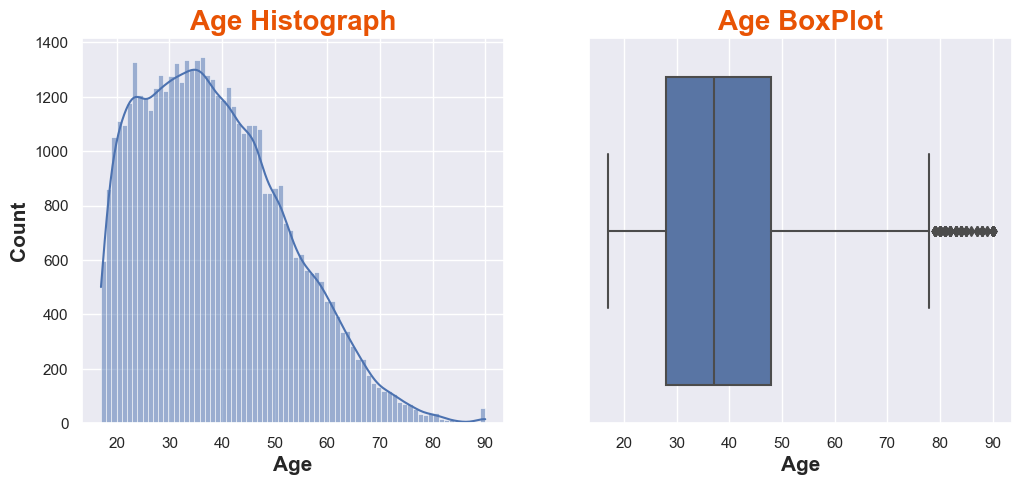

In [106]:
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
########################Histplot###############################################
sns.histplot(data=df,x="age",ax=axis[0],bins="rice",kde=True)
axis[0].set_title("Age Histograph",fontsize=20,color="#e85304",weight="bold")
axis[0].set_xlabel("Age",fontsize=15,weight="bold")
axis[0].set_ylabel("Count",fontsize=15,weight="bold")
########################Boxplot###############################################
sns.boxplot(data=df,x="age",ax=axis[1])
axis[1].set_title("Age BoxPlot",fontsize=20,color="#e85304",weight="bold")
axis[1].set_xlabel("Age",fontsize=15,weight="bold")
plt.show()

From analysis Age we can findout:<br>

    - Age distribution right skewed
    - Age column have outliers need to handle

 
> **fnlwgt column**
>
>    - fnlwgt column will not important because we have other columns give us the answer and we have different states
        - If you want to understand what is fnlwgt columns check comments [fnlwgt column meaning](https://www.kaggle.com/datasets/uciml/adult-census-income/discussion/32698)



> **Educational Num column**
>
>    - it is like encoding to education column and we do analysis for this column</p>



> Capital Gain & Capital Loss column
>
>
>I will try create new column `Capital Column` with values :
>- loss ( if person have capital loss )
>- gain ( if person have capital gain )
>- neither ( no loss & no gain)




In [107]:
df["capital_val"]=df["capital-gain"]-df['capital-loss']
df["capital"]=df["capital_val"]
df.loc[df["capital_val"]>0,"capital"]="gain"
df.loc[df["capital_val"]<0,"capital"]="loss"
df.loc[df["capital_val"]==0,"capital"]="neither"
income_col=df["income"]
df.drop(["capital-gain","capital-loss","capital_val","income"],axis=1,inplace=True)
df["income"]=income_col
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,capital,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,neither,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,neither,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,neither,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,gain,>50K
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,30,United-States,neither,<=50K


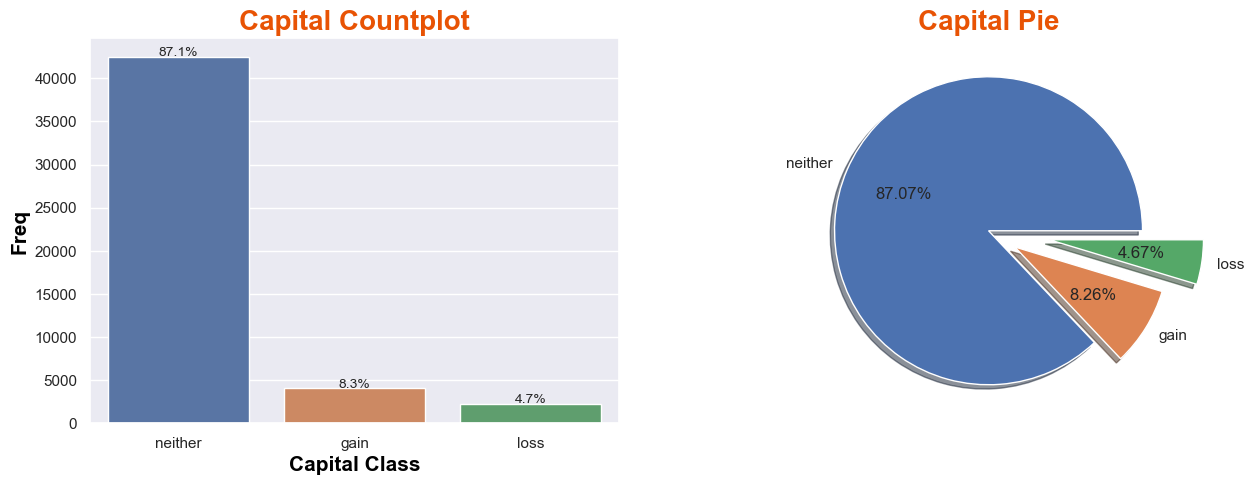


 ################################################## Frequency table ################################################## 



,count,Percentage
capital,,
neither,42525,87.07
gain,4035,8.26
loss,2282,4.67


In [108]:
capital_values = df.capital.value_counts()
fig , axis = plt.subplots(nrows=1,ncols=2,figsize=(15,5))
##################################Bar Chart##################################
axis[0].set_title("Capital Countplot",weight='bold',fontsize=20,color='#e85304')
sns.countplot( data = df, x="capital",order = capital_values.index,ax=axis[0])
axis[0].set_xlabel("Capital Class",fontsize=15,color='black',weight="bold")
axis[0].set_ylabel("Freq",fontsize=15,color='black',weight="bold")
for idx in range(len(capital_values)):
    text = f"{capital_values.values[idx]*100/len(df):.1f}%"
    axis[0].text(x=idx,y=capital_values.values[idx]+100,s=text,fontsize=10,ha='center')
##################################Pie Chart##################################
axis[1].pie(capital_values.values,labels=capital_values.index,explode=[0,0.2,0.4],shadow=True,autopct="%.2f%%")
axis[1].set_title("Capital Pie",color='#e85304',fontsize=20,weight="bold")
plt.show()

print("\n","#"*50,"Frequency table","#"*50,"\n")
freq=pd.DataFrame(capital_values)
freq["Percentage"] = round(freq['count']*100/len(df),2)
display(freq)

  
> **Hours per Week column**    


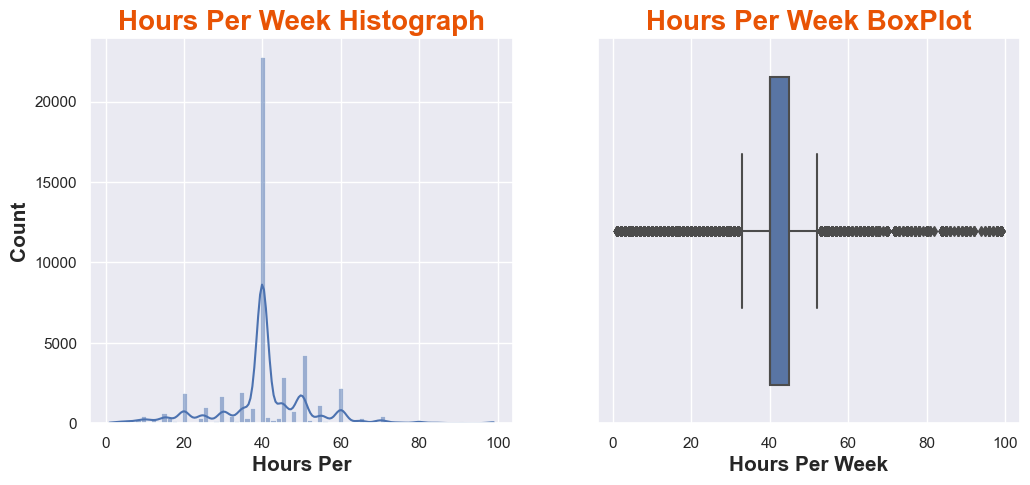

In [109]:
fig,axis=plt.subplots(nrows=1,ncols=2,figsize=(12,5))
########################Histplot###############################################
sns.histplot(data=df,x="hours-per-week",ax=axis[0],bins="rice",kde=True)
axis[0].set_title("Hours Per Week Histograph",fontsize=20,color="#e85304",weight="bold")
axis[0].set_xlabel("Hours Per",fontsize=15,weight="bold")
axis[0].set_ylabel("Count",fontsize=15,weight="bold")
########################Boxplot###############################################
sns.boxplot(data=df,x="hours-per-week",ax=axis[1])
axis[1].set_title("Hours Per Week BoxPlot",fontsize=20,color="#e85304",weight="bold")
axis[1].set_xlabel("Hours Per Week",fontsize=15,weight="bold")
plt.show()

From analysis Hours per week we can findout:<br>
    - Hours per week column have outliers need to handle

## **Bivariate Analysis**


> **Replace missing values with `unknown` trying to know the type of missing values in analysis**


In [110]:
df_analysis=df.copy()
df_analysis.fillna({"workclass":"unknown","occupation":"unknown","native-country":"unknown"},inplace=True)
print(df_analysis.select_dtypes(include="object").columns.tolist())

['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'gender', 'native-country', 'capital', 'income']


In [111]:
def categorial_analysis(col1:str,col2:str):
    freq_table_main = pd.crosstab(df_analysis[col1],
                                  df_analysis[col2],
                                  margins=True,
                                  margins_name="Count")
    freq_table=round((freq_table_main.div(freq_table_main["Count"],axis=0) * 100),2).iloc[:-1]
    display(freq_table)

  
> **Workclass vs Marital Status**


In [112]:
categorial_analysis("workclass","marital-status")

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Count
workclass,,,,,,,,
Federal-gov,16.62,0.21,50.35,1.05,25.70,2.72,3.35,100.0
Local-gov,16.87,0.00,48.98,1.05,25.45,3.19,4.46,100.0
Never-worked,10.00,0.00,10.00,10.00,70.00,0.00,0.00,100.0
Private,13.87,0.07,42.69,1.34,36.11,3.30,2.63,100.0
Self-emp-inc,8.61,0.00,74.57,0.47,12.45,1.47,2.42,100.0
Self-emp-not-inc,11.19,0.08,66.13,1.24,15.87,2.20,3.29,100.0
State-gov,15.95,0.10,44.93,1.26,32.10,3.28,2.37,100.0
Without-pay,0.00,0.00,61.90,4.76,28.57,0.00,4.76,100.0
unknown,9.61,0.18,33.12,1.57,44.12,3.47,7.93,100.0


From analysis Work Class with Marital Status we can findout:<br>
    - The most persons who Never worked are Never married like unknown category in work class so may be Nan values represent persons never worked<br>
    - The most people who worked in gov like (Federal-gov), (Local-gov), or (State gov)  being Married-civ-spouse, Never-married, or Divorced<br>

  
> **Occupation vs Marital Status**


In [113]:
categorial_analysis("occupation","marital-status")

marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed,Count
occupation,,,,,,,,
Adm-clerical,21.24,0.11,26.64,1.50,42.06,3.99,4.46,100.0
Armed-Forces,0.00,0.00,46.67,0.00,53.33,0.00,0.00,100.0
Craft-repair,11.11,0.07,62.47,1.26,21.29,2.62,1.19,100.0
Exec-managerial,14.62,0.05,59.15,0.85,20.70,2.07,2.55,100.0
Farming-fishing,6.04,0.07,58.32,2.35,29.13,1.54,2.55,100.0
Handlers-cleaners,9.51,0.05,34.94,1.54,49.66,3.04,1.25,100.0
Machine-op-inspct,14.36,0.03,48.61,1.22,28.86,4.07,2.85,100.0
Other-service,15.48,0.10,22.10,1.87,49.60,5.59,5.26,100.0
Priv-house-serv,19.01,0.00,11.16,3.72,40.91,8.68,16.53,100.0


From analysis Occupation and Marital status we can findout:<br>
    - "unknown" percentage in occupation column `with marital-status` with similar values of column work-class 

     
> **Workclass vs Occupation**


In [114]:
categorial_analysis("workclass","occupation")

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,unknown,Count
workclass,,,,,,,,,,,,,,,,
Federal-gov,34.01,1.05,6.49,18.72,0.63,2.51,1.33,3.84,0.00,17.67,3.28,1.19,6.70,2.58,0.0,100.0
Local-gov,13.42,0.00,6.73,10.55,1.37,2.07,0.77,9.57,0.00,33.83,14.35,0.51,1.85,4.97,0.0,100.0
Never-worked,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.0,100.0
Private,12.41,0.00,14.00,11.78,1.98,5.67,8.50,11.97,0.71,10.05,0.88,13.09,3.40,5.54,0.0,100.0
Self-emp-inc,2.77,0.00,9.85,36.40,4.84,0.35,1.00,2.48,0.00,14.45,0.29,24.78,0.53,2.24,0.0,100.0
Self-emp-not-inc,1.81,0.00,20.66,15.20,16.91,0.54,1.53,7.15,0.00,14.89,0.18,15.30,1.09,4.74,0.0,100.0
State-gov,18.93,0.00,4.75,14.49,1.26,0.96,0.96,9.64,0.00,31.75,8.83,1.01,4.39,3.03,0.0,100.0
Without-pay,14.29,0.00,4.76,4.76,38.10,9.52,9.52,9.52,0.00,0.00,0.00,4.76,0.00,4.76,0.0,100.0
unknown,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,100.0,100.0


From analysis Work Class and Occupation we can findout:
    - people whose Never-worked have null value in occupation (MNAR)
    <br>
    - people whose has null values in occupation are have null value in work class or never worked (MAR)
    <br>
       
</p> 
So from insights in (workclass & occupation), (workclass & marital-status), and (occupation & marital-status) I will assume unknown values as Never-worked people or create new category `unknown jobs`
        </p>
    
</div>


> **Income vs Occupation**  


In [115]:
categorial_analysis("income","occupation")

occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving,unknown,Count
income,,,,,,,,,,,,,,,,
<=50K,13.03,0.03,12.73,8.55,3.54,5.21,7.13,12.70,0.64,9.12,1.82,10.84,2.76,5.04,6.85,100.0
>50K,6.57,0.04,11.83,24.88,1.48,1.18,3.18,1.75,0.03,23.82,2.64,12.62,3.59,4.12,2.27,100.0


From analysis Income and Occupation we can findout:

    - the most of people who takes more than 50k are Exec-managerial or Prof-specialty
  
    - the most of people who takes less than or equal to 50k are Other-service or Adm-clerical
 


     
> **Income vs Age**


income
<=50K    34.0
>50K     43.0
Name: age, dtype: float64


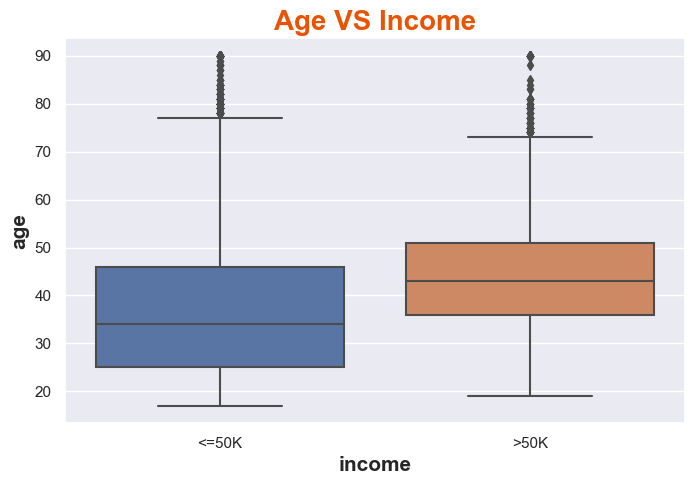

In [116]:
print(df.groupby("income").age.median())
plt.figure(figsize=(8,5))
plt.title("Age VS Income",weight='bold',fontsize=20,color='#e85304')
plt.xlabel("Income",weight='bold',fontsize=15)
plt.ylabel("Age",weight='bold',fontsize=15)
sns.boxplot(data=df_analysis,x="income",y="age")
plt.show()

From analysis Income and ِAge we can findout:

    - Increasing in age of person, increase probability of income >50K



> **Income vs Hours per week**


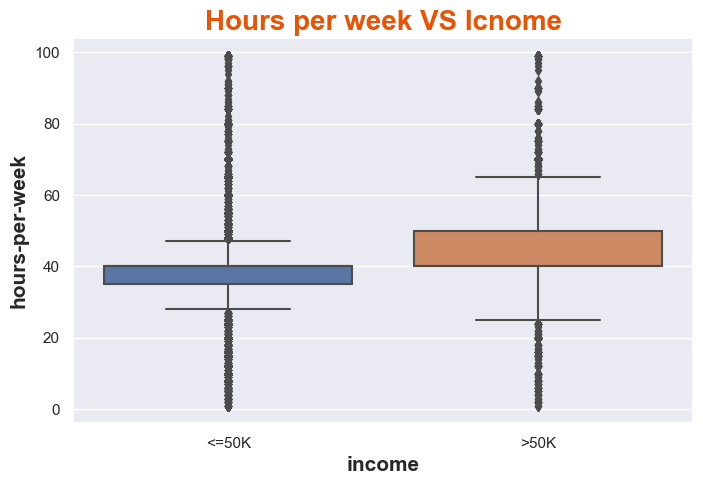

In [117]:
plt.figure(figsize=(8,5))
plt.title("Hours per week VS Icnome",weight='bold',fontsize=20,color='#e85304')
plt.xlabel("Income",weight='bold',fontsize=15)
plt.ylabel("Hours Per Week",weight='bold',fontsize=15)
sns.boxplot(data=df_analysis,x="income",y="hours-per-week")
plt.show()

From analysis of Income and ِHours per week we can findout:<br>
    - Increasing in hours per week of person, increase probability of income >50K

## **Multivariate Analysis**

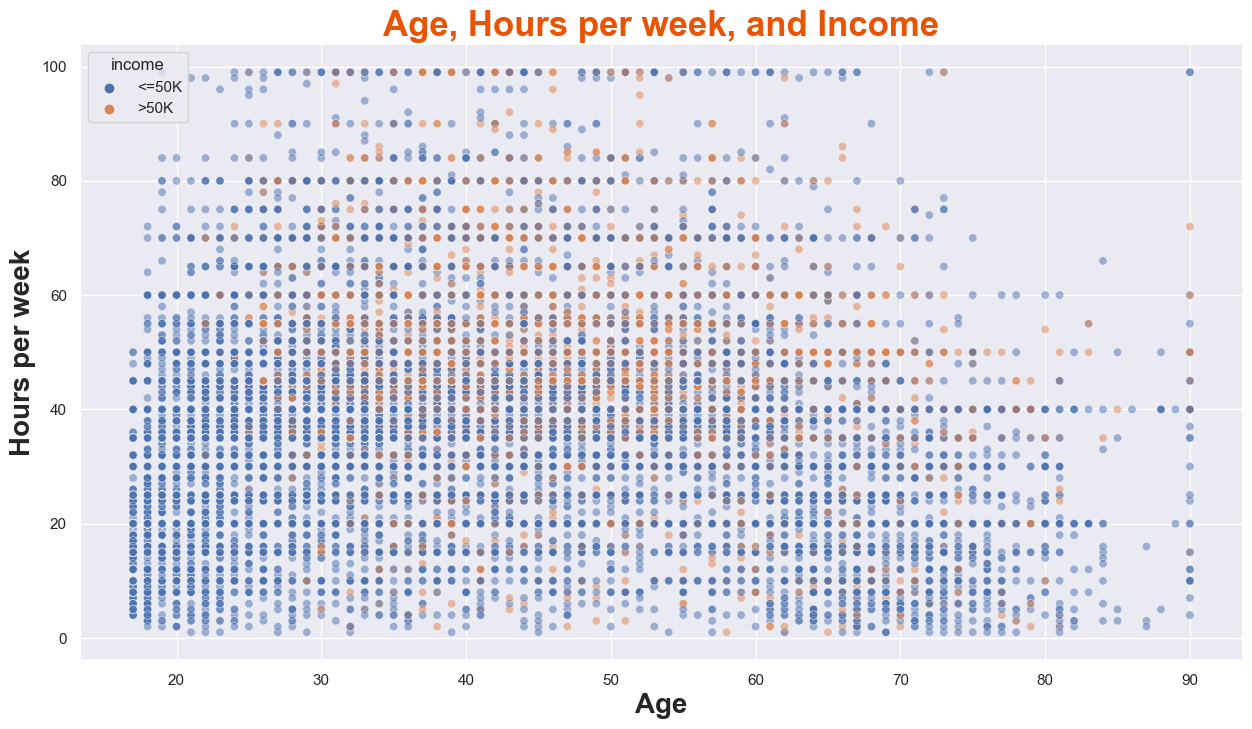

In [118]:
plt.figure(figsize=(15,8))
sns.scatterplot(data=df_analysis,x="age",y="hours-per-week",hue="income",alpha=0.5)
plt.title("Age, Hours per week, and Income",fontsize=25,weight="bold",color="#e85304")
plt.xlabel("Age",fontsize=20,weight="bold")
plt.ylabel("Hours per week",fontsize=20,weight="bold")
plt.show()

From analysis Age , Hours per week, and Income we can findout:

    - This realtion is not linearly separable